# NLP for Yelp Reviews. Classification Project


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Data
Reading the yelp.csv file 

In [4]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Creating "text length" column which cpunts the number of words in the text column

In [6]:
yelp['text length'] = yelp['text'].apply(len)

# Data Visuals


boxplot

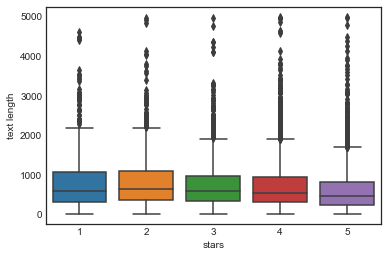

In [7]:
sns.boxplot(x='stars',y='text length',data=yelp)

countplot

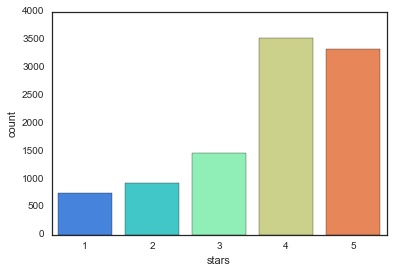

In [104]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

## NLP Classification Task

grab reviews that were either 1 star or 5 stars.

Creating a dataframe called yelp_class that contains the columns for only the 1 or 5 star reviews

In [8]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

features and target labels

In [21]:
X = yelp_class['text']
y = yelp_class['stars']

Importing CountVectorizer and create a CountVectorizer object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Use the fit_transform method on the CountVectorizer object and pass in X ('text')

In [23]:
X = cv.fit_transform(X)

## Train Test Split


Using train_test_split to split the data into X_train, X_test, y_train, y_test.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model



MultinomialNB 

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##  Evaluations




In [28]:
predictions = nb.predict(X_test)

confusion matrix and classification report

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Including TF-IDF to this process using a pipeline

# TfidfTransformer 

In [31]:
from sklearn.feature_extraction.text import  TfidfTransformer

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [155]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [33]:
from sklearn.pipeline import Pipeline

# Pipeline with CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [37]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

### Train Test Split


In [38]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

fit the pipeline to the training data. 

We have to use initial training data (not the vectorized) 

In [40]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

Use pipeline again to predict and evaluate

In [41]:
predictions = pipeline.predict(X_test)

In [42]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\David\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# conclusion 
Tf-IDF has badly affected the results.

# future work

We can use vectorization with tf-idf

or

we can change classification algorithms 